<center><h3>
UNIVERSIDADE FEDERAL DO PARANÁ<br>
SETOR DE EDUCAÇÃO PROFISSIONAL E TECNOLÓGICA
</center><br><br><br>

<center><H3>LUCAS MARTINS SORRENTINO</center><br><br><br>

<center><b><h3>DADOS E RACISMO ESTRUTURAL NO SUS EM CURITIBA</b></center><br><br><br>

 <p align="right">Trabalho apresentado à disciplina 'Visualização<br> de Dados e Storytelling', ministrada pela profa.<br> Dra. Isabela Mantovani Fontana ao Curso de<br>Pós-graduação de Inteligência Artificial Aplicada,<br>Turma 2025.</p><br><br><br>

<CENTER> CURITIBA<br>2025</CENTER><br><br><br>

Este trabalho foi inspirado pela tese de doutorado do sociógolo André Marega Pinhel (https://www.teses.usp.br/teses/disponiveis/8/8132/tde-31102024-135539/publico/2024_AndreMaregaPinhel_VCor.pdf), e tem como público alvo a população média da cidade de Curitiba.<br>
<br><br>
<h4>História:</h4>
<p>O Sistema Único de Saúde, o SUS, nasceu de um princípio fundamental: a saúde é um direito de todos e um dever do Estado. Uma promessa de acesso universal, integral e, acima de tudo, igualitário.
Por trás de cada atendimento realizado no SUS, existe uma pessoa. Um cidadão com uma história, uma família, e uma necessidade de cuidado. E quando somamos milhões desses atendimentos, eles se transformam em dados, em estatísticas.</p>

<p>O que esses números nos contam? A história que emerge deles é uma só para todos os brasileiros?</p>

<p>Nesta apresentação, vamos sair do campo das impressões e mergulhar na frieza dos números. Os gráficos que vocês verão a seguir não contêm opiniões, mas sim evidências. Eles são um retrato estatístico de como a desigualdade racial se manifesta no acesso e na qualidade do atendimento em saúde no Brasil. Tenatrei usar os dados para tornar visível um problema estrutural necessário para discutir caminhos de um SUS verdadeiramente para todos.</p>
<p>Neste trabalho eu vou usar a base de dados de Autorização para Internação Hospitalar (AIH), que é a base do Sistema de Informações Hospitalares (SIH/SUS). Este sistema registra dados detalhados sobre as internações, em todo o Brasil, porém eu vou trabalhar exclusivamente com os dados das instituições de saúde da capital paranaense. Nesta base de dados cada registro corresponde a uma AIH, que é um documento obrigatório para autorizar e registrar uma internação hospitalar pelo sistema público.</p>
<p>Entre as informações presentes na base estão: dados do paciente (idade, sexo, raça/cor, município de residência), dados do atendimento (tipo de internação, motivo, procedimentos realizados, data de entrada e alta), diagnóstico, características do hospital e informações administrativas (valores pagos, códigos de procedimentos e profissionais envolvidos).

A base AIH/SIH/SUS é fundamental para monitorar o perfil das internações, planejar políticas de saúde, acompanhar a alocação de recursos e identificar desigualdades no acesso e na qualidade dos atendimentos hospitalares, incluindo recortes por raça/cor, região, faixa etária e outros fatores.</p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

caminho_do_arquivo = 'limpando17.07.25.csv'

    # 1. Carrega os dados originais do arquivo CSV para um DataFrame.
df_original = pd.read_csv(caminho_do_arquivo)
print(f"Arquivo '{caminho_do_arquivo}' carregado com sucesso.")
print(f"O DataFrame original tem {len(df_original)} linhas.")

    # 2. Cria uma cópia explícita do DataFrame para manipulação.
    # Todas as modificações serão feitas nesta cópia.
df = df_original.copy()
print("Cópia do DataFrame criada para processamento.")


Arquivo 'limpando17.07.25.csv' carregado com sucesso.
O DataFrame original tem 4476243 linhas.
Cópia do DataFrame criada para processamento.


O gráfico abaixo é um simples cruzamento de dados sobre os atendimentos de internação hospitalar com base na raça. Repare que o "sem informação" é quando a raça não é informada.


Gerando o gráfico com limites de eixo ajustados...

Gráfico salvo com sucesso como 'proporcao_raca_ate_2021_corrigido.png'!


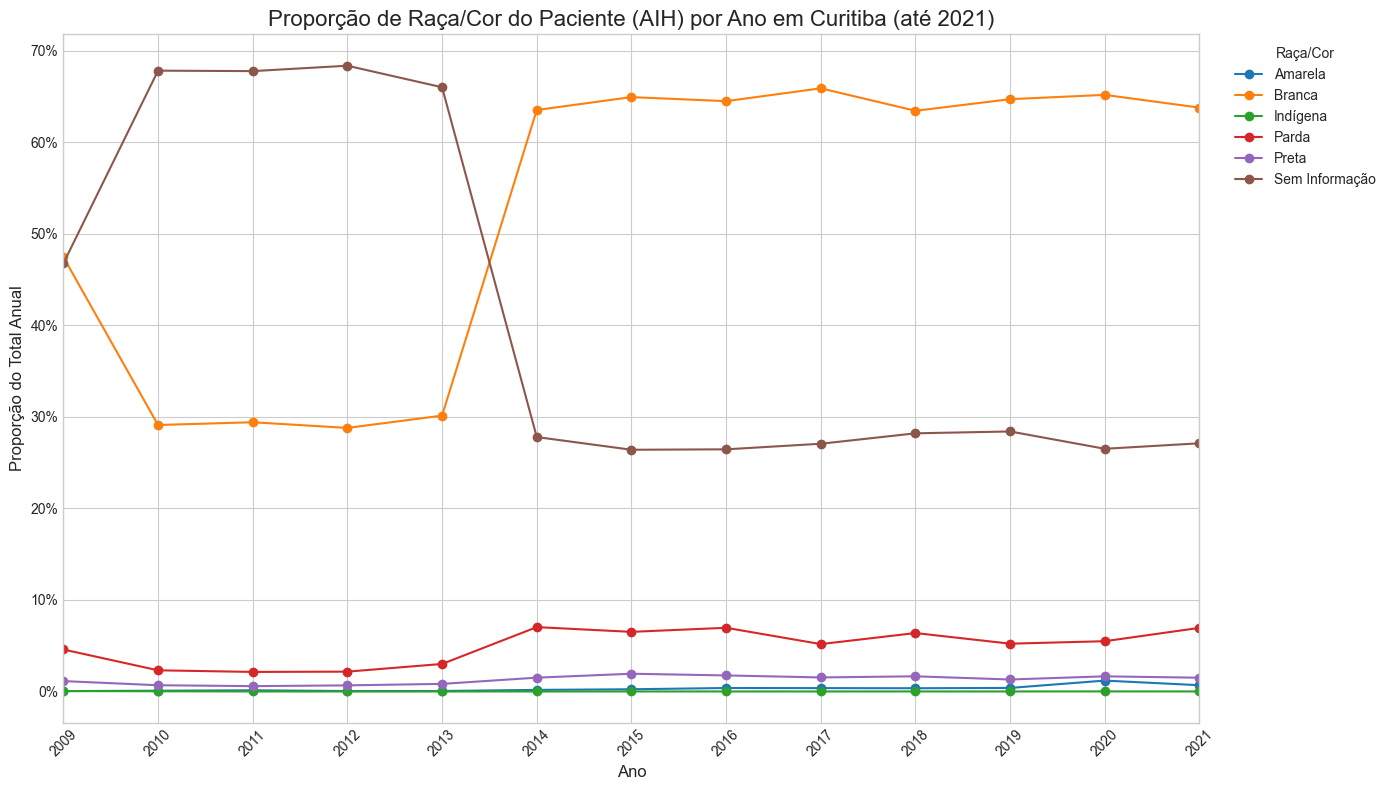

In [16]:
    # --- PREPARAÇÃO DOS DADOS ---
df_filtrado = df.dropna(subset=['ano', 'raca_cor_paciente'])
    # 1. Cria uma tabela de contagem com anos nas linhas e raça/cor nas colunas
    # Garante que 'ano' seja do tipo inteiro
df_filtrado['ano'] = df_filtrado['ano'].astype(int)
    
# Filtra o DataFrame para incluir dados apenas até o ano de 2021
df_filtrado21 = df_filtrado[df_filtrado['ano'] <= 2021]

    # 1. Cria a tabela de contagem
contagens = pd.crosstab(df_filtrado21['ano'], df_filtrado21['raca_cor_paciente'])

    # 2. Calcula as proporções
proporcoes = contagens.div(contagens.sum(axis=1), axis=0)
proporcoes.sort_index(inplace=True) # Garante a ordem dos anos

    # --- GERAÇÃO DO GRÁFICO ---
print("\nGerando o gráfico com limites de eixo ajustados...")

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(14, 8))

proporcoes.plot(kind='line', marker='o', ax=ax)

    # --- FORMATAÇÃO E SOLUÇÃO DO PROBLEMA ---
    
    # Define o título e os rótulos
ax.set_title('Proporção de Raça/Cor do Paciente (AIH) por Ano em Curitiba (até 2021)', fontsize=16)
ax.set_xlabel('Ano', fontsize=12)
ax.set_ylabel('Proporção do Total Anual', fontsize=12)
ax.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1.0))

    # Garante que todos os anos sejam exibidos como ticks
ax.set_xticks(proporcoes.index)
plt.xticks(rotation=45)
    
    # (A SOLUÇÃO) Define o limite do eixo X para começar e terminar exatamente com os dados
ano_inicio = proporcoes.index.min()
ano_fim = proporcoes.index.max()
ax.set_xlim(ano_inicio, ano_fim)

    # Move a legenda para fora do gráfico
ax.legend(title='Raça/Cor', bbox_to_anchor=(1.02, 1), loc='upper left')
    
plt.tight_layout()

    # Salva o gráfico
caminho_saida_grafico = 'proporcao_raca_ate_2021_corrigido.png'
plt.savefig(caminho_saida_grafico)

print(f"\nGráfico salvo com sucesso como '{caminho_saida_grafico}'!")

O conceito para explicar a ausênica desses dados sobre raça é "subnotificação", ela por sí já é uma evidência histórica sobre o racismo no Brasil. Os problemas raciais no Brasil foram sistematicamente ocultados em nossa história em favor de um mito de democracia racial, o que reforçou a dimensão estrutural do racismo. <br><br>
Em outubro de 2022 o campo 'raça' passou a ser de preenchimento obrigatório no sistema das AIHs, verifiquem o mesmo padrão gráfico incluindo os anos de 22 à 24.


--- Proporção de cada Raça/Cor por Ano (incluindo 'Ignorado') ---
raca_cor_paciente  Amarela  Branca  Indígena  Parda  Preta  Sem Informação
ano                                                                       
2009                  0.04   47.44      0.05   4.59   1.13           46.75
2010                  0.08   29.10      0.02   2.31   0.68           67.80
2011                  0.13   29.40      0.00   2.13   0.58           67.75
2012                  0.05   28.78      0.00   2.17   0.67           68.34
2013                  0.05   30.13      0.00   3.01   0.83           65.99
2014                  0.17   63.50      0.00   7.03   1.51           27.79
2015                  0.24   64.91      0.00   6.51   1.94           26.40
2016                  0.38   64.47      0.00   6.96   1.75           26.44
2017                  0.37   65.87      0.00   5.17   1.53           27.05
2018                  0.35   63.42      0.00   6.38   1.66           28.19
2019                  0.39   64.6

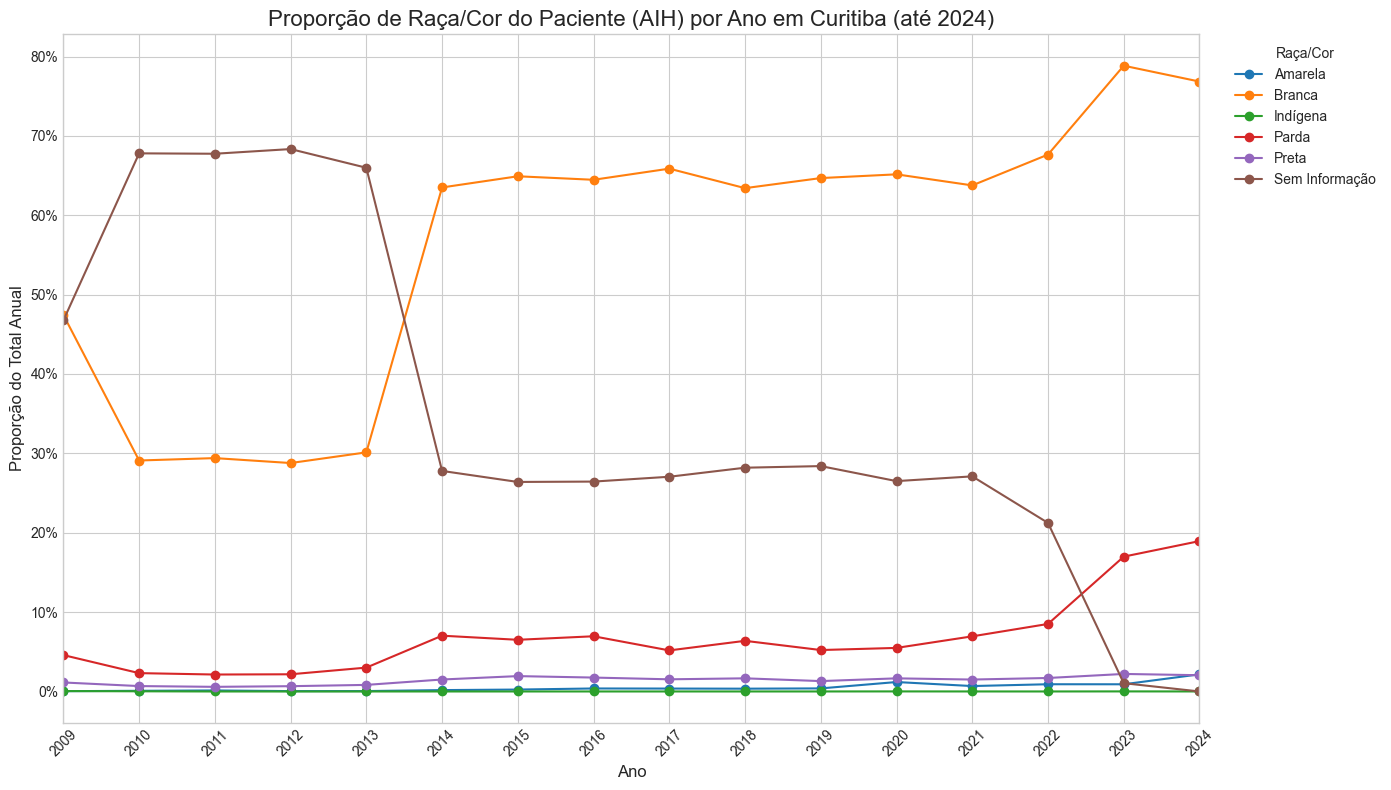

In [17]:
    # --- PREPARAÇÃO DOS DADOS ---
df_filtrado = df.dropna(subset=['ano', 'raca_cor_paciente'])
    # 1. Cria uma tabela de contagem com anos nas linhas e raça/cor nas colunas
contagens = pd.crosstab(df_filtrado['ano'], df['raca_cor_paciente'])

    # 2. Divide cada linha pela soma da linha para obter a proporção
proporcoes = contagens.div(contagens.sum(axis=1), axis=0)

print("\n--- Proporção de cada Raça/Cor por Ano (incluindo 'Ignorado') ---")
print((proporcoes * 100).round(2))

    # --- GERAÇÃO DO GRÁFICO ---
print("\nGerando o gráfico de série temporal...")

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(14, 8))

    # Plota automaticamente cada coluna (cada raça/cor) como uma linha separada
proporcoes.plot(kind='line', marker='o', ax=ax)

    # Formatação do gráfico

     # Define o título e os rótulos
ax.set_title('Proporção de Raça/Cor do Paciente (AIH) por Ano em Curitiba (até 2024)', fontsize=16)
ax.set_xlabel('Ano', fontsize=12)
ax.set_ylabel('Proporção do Total Anual', fontsize=12)
ax.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1.0))

    # Garante que todos os anos sejam exibidos como ticks
ax.set_xticks(proporcoes.index)
plt.xticks(rotation=45)
    
    # (A SOLUÇÃO) Define o limite do eixo X para começar e terminar exatamente com os dados
ano_inicio = proporcoes.index.min()
ano_fim = proporcoes.index.max()
ax.set_xlim(ano_inicio, ano_fim)

    # Move a legenda para fora do gráfico
ax.legend(title='Raça/Cor', bbox_to_anchor=(1.02, 1), loc='upper left')
    
plt.tight_layout()

    # Salva o gráfico
caminho_saida_grafico = 'proporcao_raca_ate_2024_corrigido.png'
plt.savefig(caminho_saida_grafico)

print(f"\nGráfico salvo com sucesso como '{caminho_saida_grafico}'!")

# ax.set_title('Proporção de Raça/Cor do Paciente nas Internações (AIH) por Ano em Curitiba', fontsize=16)
# ax.set_xlabel('Ano', fontsize=12)
# ax.set_ylabel('Proporção do Total Anual', fontsize=12)
    
#     # Formata o eixo Y para mostrar percentuais
# ax.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1.0))
    
#     # Garante que os anos no eixo X sejam números inteiros
# ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

# plt.xticks(rotation=45)

#     # Move a legenda para fora do gráfico
# ax.legend(title='Raça/Cor', bbox_to_anchor=(1.02, 1), loc='upper left')
    
# plt.tight_layout()

#     # Salva o gráfico
# caminho_saida_grafico = 'proporcao_raca_por_ano_com_ignorados.png'
# plt.savefig(caminho_saida_grafico)

# print(f"\nGráfico salvo com sucesso como '{caminho_saida_grafico}'!")

Há uma mudança significativa na percepção dos dados, mas, curiosamente, há um aumento significativo também na popopulação branca. O que aparentemente poderia fazer crer que a subnotificação seria indiscriminada. <br>

No gráfico abaixo a série temporal excluindo os dados "Sem Informação". 


--- Proporção de cada Raça/Cor por Ano (incluindo 'Ignorado') ---
raca_cor_paciente  Amarela  Branca  Indígena  Parda  Preta
ano                                                       
2009                  0.07   89.09      0.09   8.61   2.13
2010                  0.26   90.38      0.07   7.18   2.11
2011                  0.40   91.17      0.00   6.62   1.81
2012                  0.15   90.91      0.00   6.84   2.10
2013                  0.15   88.57      0.00   8.84   2.44
2014                  0.24   87.94      0.00   9.73   2.09
2015                  0.33   88.19      0.00   8.85   2.63
2016                  0.51   87.65      0.00   9.46   2.38
2017                  0.50   90.30      0.00   7.09   2.10
2018                  0.49   88.31      0.00   8.89   2.31
2019                  0.54   90.34      0.00   7.29   1.83
2020                  1.62   88.65      0.01   7.47   2.25
2021                  0.94   87.47      0.00   9.53   2.06
2022                  1.16   85.88      0.00  10

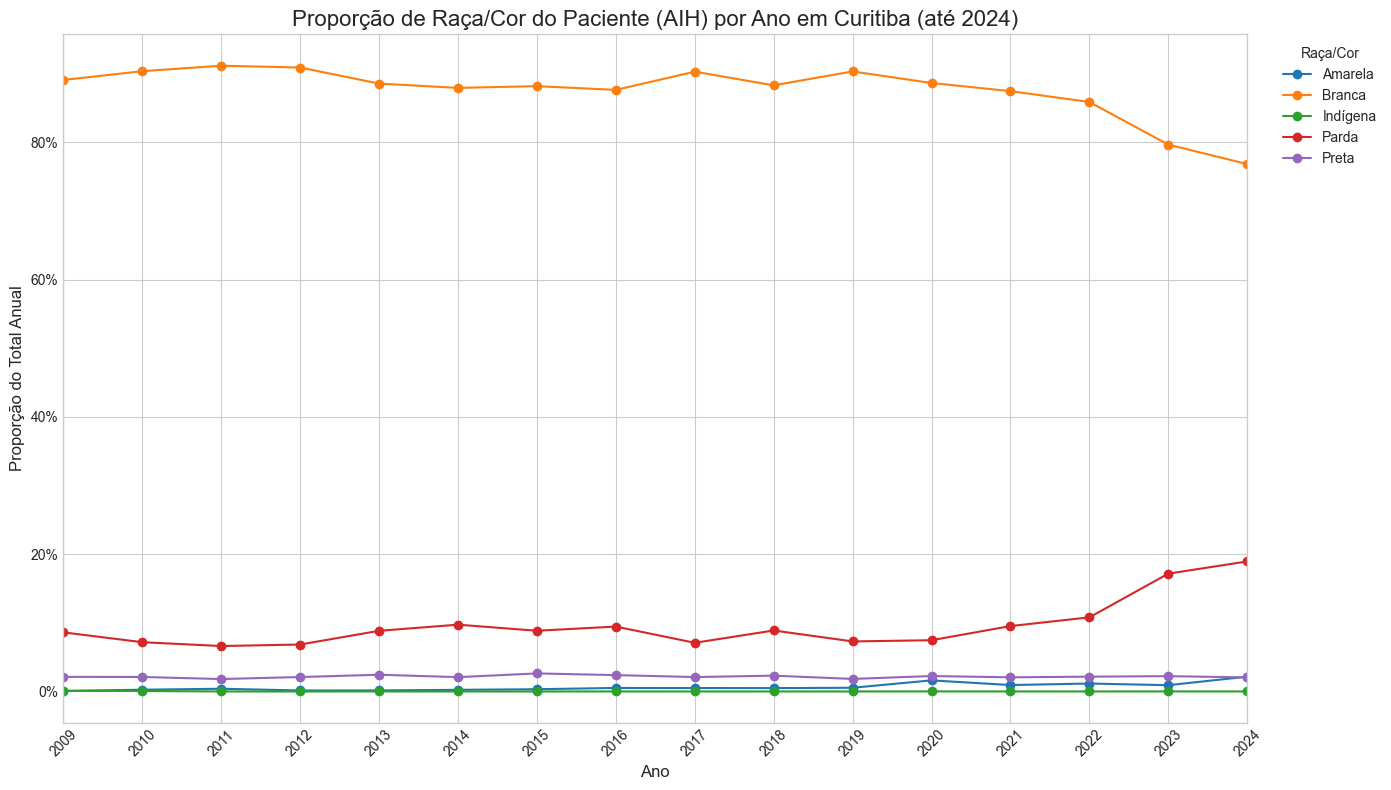

In [20]:
df_filtrado = df_filtrado[df_filtrado['raca_cor_paciente'] != 'Sem Informação']

    # 1. Cria uma tabela de contagem com anos nas linhas e raça/cor nas colunas
contagens = pd.crosstab(df_filtrado['ano'], df['raca_cor_paciente'])

    # 2. Divide cada linha pela soma da linha para obter a proporção
proporcoes = contagens.div(contagens.sum(axis=1), axis=0)

print("\n--- Proporção de cada Raça/Cor por Ano (incluindo 'Ignorado') ---")
print((proporcoes * 100).round(2))

    # --- GERAÇÃO DO GRÁFICO ---
print("\nGerando o gráfico de série temporal...")

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(14, 8))

    # Plota automaticamente cada coluna (cada raça/cor) como uma linha separada
proporcoes.plot(kind='line', marker='o', ax=ax)

    # Formatação do gráfico

     # Define o título e os rótulos
ax.set_title('Proporção de Raça/Cor do Paciente (AIH) por Ano em Curitiba (até 2024)', fontsize=16)
ax.set_xlabel('Ano', fontsize=12)
ax.set_ylabel('Proporção do Total Anual', fontsize=12)
ax.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1.0))

    # Garante que todos os anos sejam exibidos como ticks
ax.set_xticks(proporcoes.index)
plt.xticks(rotation=45)
    
    # (A SOLUÇÃO) Define o limite do eixo X para começar e terminar exatamente com os dados
ano_inicio = proporcoes.index.min()
ano_fim = proporcoes.index.max()
ax.set_xlim(ano_inicio, ano_fim)

    # Move a legenda para fora do gráfico
ax.legend(title='Raça/Cor', bbox_to_anchor=(1.02, 1), loc='upper left')
    
plt.tight_layout()

    # Salva o gráfico
caminho_saida_grafico = 'proporcao_raca_ate_2024_corrigido.png'
plt.savefig(caminho_saida_grafico)

print(f"\nGráfico salvo com sucesso como '{caminho_saida_grafico}'!")

Percebam que, aparentemente, a proporação racial (21%) passa a se aproximar aos dados do censo de 2022 do IBGE, que é de 24% da população que se autodeclara preta ou parda em Curitiba. Como a proporção entre as raças muda significativamente a partir de 2022 aquela aparência, sa primeira vista, que incluiam os dados "Sem Informação", de que a subnotificação era indiscriminada, fica visualmente invalidada.

In [ ]:
caminho_do_arquivo = 'dataset_final_com_raca.csv'

# Colunas e valores que usaremos para o filtro e análise
coluna_carater = 'carater_internacao'
valor_filtro = 'Eletivo'
coluna_raca = 'raca_cor_descrita'

try:
    # Carrega o DataFrame
    df = pd.read_csv(caminho_do_arquivo, low_memory=False)
    print("Arquivo carregado com sucesso!")

    # --- PASSO 1: FILTRAR APENAS INTERNAÇÕES ELETIVAS ---
    # Usamos .copy() para evitar avisos de SettingWithCopyWarning
    df_eletivas = df[df[coluna_carater] == valor_filtro].copy()
    
    print(f"\nDados filtrados para manter apenas as {len(df_eletivas)} internações eletivas.")

    # --- PREPARAÇÃO DOS DADOS FILTRADOS ---
    # Remove as linhas onde 'ano' ou a coluna de raça/cor são nulos
    df_eletivas_filtrado = df_eletivas.dropna(subset=['ano', coluna_raca])
    df_eletivas_filtrado['ano'] = df_eletivas_filtrado['ano'].astype(int)
    
    # --- CÁLCULO DAS PROPORÇÕES (SOBRE OS DADOS ELETIVOS) ---
    
    # 1. Cria uma tabela de contagem com anos nas linhas e raça/cor nas colunas
    contagens = pd.crosstab(df_eletivas_filtrado['ano'], df_eletivas_filtrado[coluna_raca])

    # 2. Divide cada linha pela soma da linha para obter a proporção
    proporcoes = contagens.div(contagens.sum(axis=1), axis=0)

    print(f"\n--- Proporção de cada Raça/Cor por Ano (Apenas em Internações Eletivas) ---")
    print((proporcoes * 100).round(2))

    # --- GERAÇÃO DO GRÁFICO ---
    print("\nGerando o gráfico de série temporal...")

    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(14, 8))

    # Plota os dados de proporção
    proporcoes.plot(kind='line', marker='o', ax=ax)

    # Formatação do gráfico
    ax.set_title(f'Proporção de Raça/Cor nas Internações Eletivas por Ano', fontsize=16)
    ax.set_xlabel('Ano', fontsize=12)
    ax.set_ylabel('Proporção do Total de Internações Eletivas', fontsize=12)
    
    # Formata o eixo Y para mostrar percentuais
    ax.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1.0))
    
    # Garante que os anos no eixo X sejam números inteiros
    ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
    plt.xticks(rotation=45)

    # Move a legenda para fora do gráfico
    ax.legend(title='Raça/Cor', bbox_to_anchor=(1.02, 1), loc='upper left')
    
    plt.tight_layout()

    # Salva o gráfico
    caminho_saida_grafico = 'proporcao_raca_eletivas_por_ano.png'
    plt.savefig(caminho_saida_grafico)

    print(f"\nGráfico salvo com sucesso como '{caminho_saida_grafico}'!")

except FileNotFoundError:
    print(f"ERRO: O arquivo '{caminho_do_arquivo}' não foi encontrado.")
except KeyError as e:
    print(f"ERRO: A coluna {e} não foi encontrada. Verifique se o nome da coluna está correto no seu arquivo.")
except Exception as e:
    print(f"Ocorreu um erro inesperado: {e}")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4476243 entries, 0 to 4476242
Data columns (total 68 columns):
 #   Column                                             Dtype  
---  ------                                             -----  
 0   ano                                                int64  
 1   mes                                                int64  
 2   id_aih                                             int64  
 3   tipo_aih                                           object 
 4   motivo_autorizacao_aih                             object 
 5   sequencial_aih                                     int64  
 6   especialidade_leito                                object 
 7   motivo_saida                                       object 
 8   tipo_uti                                           object 
 9   tipo_uci                                           object 
 10  carater_internacao                                 object 
 11  data_internacao                                   